<function matplotlib.pyplot.show(*args, **kw)>

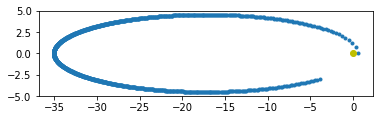

In [60]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67e-11
Ms=1.989e30
AU=149.6e9
YEARS=86400*365.25
a=17.834*AU
e=0.96714
t_ini=0.0
t_end=74.32*YEARS

def Newton(t):

    M = (G*Ms/a**3)**0.5 * t
    
    def f(E):
        value=M-E+e*np.sin(E)
        return value

    def dfdE(E):
        value=-1+e*np.cos(E)
        return value
    
    Tol=1.0e-4
    Nmax=1000
    iteracion=0
    error=1.0
    p_prev=M

    while(error>Tol):
        p = p_prev - f(p_prev)/dfdE(p_prev)
        error=abs(p-p_prev)
        p_prev=p
        iteracion+=1
        if(iteracion>=Nmax):
            print("El metodo no converge")
            break
            
    return p
    


time_array=np.linspace(t_ini,t_end,1000)

phi_array=[]
r_array=[]

for i in range(0,len(time_array)):
    E=Newton(time_array[i])
    phi=2*np.arctan(((1+e)/(1-e))**0.5 * np.tan(0.5*E))
    r=a*(1-e**2)/(1+e*np.cos(phi))
    phi_array.append(phi)
    r_array.append(r/AU)


#print (phi_array)
#print (r_array)

x_array=[]
y_array=[]

for i in range(0,len(time_array)):
    x = r_array[i]*np.cos(phi_array[i])
    y = r_array[i]*np.sin(phi_array[i])
    x_array.append(x)
    y_array.append(y)



fig=plt.figure()
ax=plt.axes()
ax.plot(x_array,y_array,'.')
ax.plot(0,0,'yo')
ax.set_aspect('equal')
plt.show

        

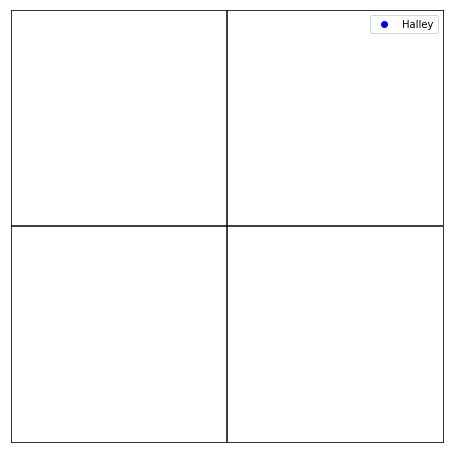

In [68]:
import matplotlib.animation as animation
# Scenario
fig=plt.figure(figsize=(6,6))
ax=fig.add_axes([0,0,1,1],xlim=(-2,2),ylim=(-2,2))
ax.set_xticks([])
ax.set_yticks([])
ax.axhline(0.0,color='k')
ax.axvline(0.0,color='k')


# Initial position
particle,=ax.plot([],[],'bo',label='Halley')
time_template = 'time = %0.1f yr'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)
ax.legend()


# Initialize
def init():
    particle.set_data([],[])
    time_text.set_text('')
    return particle, time_text

# Animation properties
P=t_end
nframes=1000
nanim=t_end/nframes
dtframe=2
fps=100

# Animation routine
def animate(iframe):
    t=nanim*iframe
    tshow=nanim*iframe
    E=Newton(t)
    x=a*(cos(E)-e)
    y=b*sin(E)
    particle.set_data(x,y)
    time_text.set_text(time_template%(tshow))
    

# Animate
anim=animation.FuncAnimation(fig,animate,init_func=init,frames=nframes,interval=dtframe,blit=True)
#anim.save("orbita-kepler.mp4",fps=fps)

